In [1]:
from BorderModel import IncrementalModel
from BorderQuery import select_features, select_mungedata, select_mungedata_simple
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.grid_search import GridSearchCV
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline
import pprint
from multiprocessing import Pool

In [2]:
def gridsearch(params, df_train):
    model = ExtraTreesRegressor(n_jobs=-1, n_estimators=96)
    grid = GridSearchCV(model, params)
    im = IncrementalModel(df_train, grid, categoricals=['event'])
    im.predict(X_test)   
    return im.score(actuals.waittime)

In [3]:
df_train = select_mungedata(3, 1, '2013-1-1', '2015-1-1')
X_test = select_features('2015-1-1', '2016-1-1')
actuals = select_mungedata_simple(3, 1, '2015-1-1', '2016-1-1')

## max_features

In [4]:
param_options = [{'max_features': ['sqrt']}]
[gridsearch(params, df_train) for params in param_options]

Weights:  1.08483102626 0.917058620361


[{'baseline': 0.1059067680212642,
  'ensemble': 0.21188484784763562,
  'model': 0.14421650403442554}]

### Another candidate for ensembling - high variance with baseline even though raw score is not great

## Min_samples_split

In [5]:
param_options = [{'min_samples_split': [2]}, {'min_samples_split': [6]}, {'min_samples_split': [18]}, 
                 {'min_samples_split': [54]}]
[gridsearch(params, df_train) for params in param_options]

Weights:  1.38875255935 0.635830160893
Weights:  1.31423156409 0.563280796789
Weights:  1.34110891461 0.445488118848
Weights:  1.59525189843 0.50821749111


[{'baseline': 0.1059067680212642,
  'ensemble': 0.1760371615368912,
  'model': 0.166278369845131},
 {'baseline': 0.1059067680212642,
  'ensemble': 0.16993950316251216,
  'model': 0.16656784313947048},
 {'baseline': 0.1059067680212642,
  'ensemble': 0.1649894185390316,
  'model': 0.18710214804721736},
 {'baseline': 0.1059067680212642,
  'ensemble': 0.15881171624866763,
  'model': 0.18304495137336385}]

In [7]:
param_options = [{'min_samples_split': [14]}, {'min_samples_split': [20]}, {'min_samples_split': [28]}, 
                 {'min_samples_split': [34]}, {'min_samples_split': [100]}]
[gridsearch(params, df_train) for params in param_options]

Weights:  1.02315746596 0.357466269274
Weights:  1.35488077384 0.487916462806
Weights:  1.54818493686 0.55273082876
Weights:  2.09336409827 0.730661197713
Weights:  2.61821429723 0.61796986378


[{'baseline': 0.1059067680212642,
  'ensemble': 0.16622048134256018,
  'model': 0.18338342506469374},
 {'baseline': 0.1059067680212642,
  'ensemble': 0.16504143288648254,
  'model': 0.17993958501449947},
 {'baseline': 0.1059067680212642,
  'ensemble': 0.16583510600357299,
  'model': 0.18085854740005891},
 {'baseline': 0.1059067680212642,
  'ensemble': 0.16345240013889983,
  'model': 0.18060398182002868},
 {'baseline': 0.1059067680212642,
  'ensemble': 0.14809953843154788,
  'model': 0.19327043271133082}]

#### Search above 100

In [9]:
param_options = [{'min_samples_split': [200]}, {'min_samples_split': [300]}, {'min_samples_split': [500]}]
[gridsearch(params, df_train) for params in param_options]

Weights:  1.56399855123 0.361996816258
Weights:  1.49143554094 0.457512309039
Weights:  1.5131612598 0.738165842042


[{'baseline': 0.1059067680212642,
  'ensemble': 0.14111261929226571,
  'model': 0.18113292463364061},
 {'baseline': 0.1059067680212642,
  'ensemble': 0.14374037522118122,
  'model': 0.16510284400970043},
 {'baseline': 0.1059067680212642,
  'ensemble': 0.15129896418461619,
  'model': 0.14397479213185216}]

#### closer to 100 is better

In [10]:
param_options = [{'min_samples_split': [80]}, {'min_samples_split': [120]}]
[gridsearch(params, df_train) for params in param_options]

Weights:  1.36474089719 0.371373156829
Weights:  1.44013236051 0.404297683495


[{'baseline': 0.1059067680212642,
  'ensemble': 0.15310373770790697,
  'model': 0.18836533304176628},
 {'baseline': 0.1059067680212642,
  'ensemble': 0.14943317513063992,
  'model': 0.18032578333061766}]

## Combine parameters which yielded high ensemble scores

In [11]:
param_options = [{'max_depth': [4], 'max_features': ['sqrt']},
                 {'min_samples_split': [80], 'max_features': ['sqrt']},
                 {'min_samples_split': [80], 'max_features': ['sqrt'], 'max_depth': [4]}
                ]
[gridsearch(params, df_train) for params in param_options]

Weights:  0.601449590483 1.28767121035
Weights:  0.834801272278 1.15170741918
Weights:  0.618392844567 1.27454249666


[{'baseline': 0.1059067680212642,
  'ensemble': 0.27118064592085067,
  'model': -0.13265952518414359},
 {'baseline': 0.1059067680212642,
  'ensemble': 0.35153216922591779,
  'model': 0.068283196145105363},
 {'baseline': 0.1059067680212642,
  'ensemble': 0.27638389752972392,
  'model': -0.12604087467258895}]

In [12]:
param_options = [{'max_depth': [20], 'max_features': ['sqrt']},
                 {'min_samples_split': [80], 'max_features': ['sqrt'], 'max_depth': [20]}
                ]
[gridsearch(params, df_train) for params in param_options]

Weights:  1.45731645118 0.878476155122
Weights:  1.02592731825 1.59653167279


[{'baseline': 0.1059067680212642,
  'ensemble': 0.31353717327302255,
  'model': 0.24952074019536319},
 {'baseline': 0.1059067680212642,
  'ensemble': 0.3425158924349071,
  'model': 0.029892728557007309}]

## Combine parameters which yielded high individual scores

In [16]:
param_options = [{'min_samples_leaf': [4], 'max_features': ['sqrt'], 'max_depth': [12], 'min_samples_split': [100]}]
[gridsearch(params, df_train) for params in param_options]

Weights:  0.648705882141 1.11506766734


[{'baseline': 0.1059067680212642,
  'ensemble': 0.32463487921603296,
  'model': -0.018007946927970364}]

### Drill into a best balanced model with .25 model score and .31 ensemble score

In [19]:
model = ExtraTreesRegressor(n_jobs=-1, n_estimators=96, max_features='sqrt', max_depth=20)
grid = GridSearchCV(model, {})
im = IncrementalModel(df_train, grid, categoricals=['event'])
yhat = im.predict(X_test)   
im.score(actuals.waittime)

Weights:  1.41267760725 0.836088321666


{'baseline': 0.1059067680212642,
 'ensemble': 0.30242191911734839,
 'model': 0.23796885172973659}

In [22]:
baseline = im.baseline()
ensemble = im.ensemble(actuals.waittime, baseline)

Weights:  1.41267760725 0.836088321666


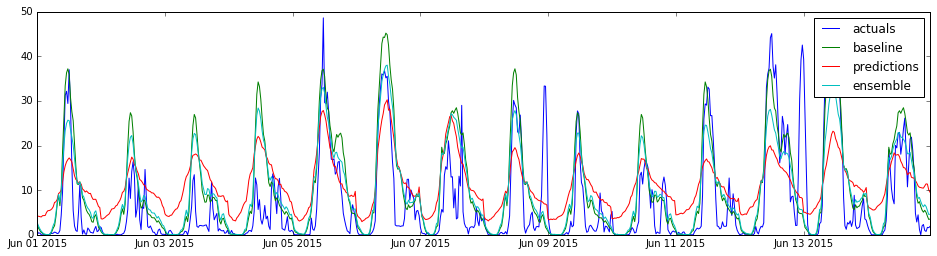

In [29]:
start = dt.date(2015, 6, 1)
end = dt.date(2015, 6, 15)

plt.figure(figsize=(16,4))
plt.plot(actuals[(actuals.index.date>=start) & (actuals.index.date<end)].waittime, label='actuals')
plt.plot(baseline[(baseline.index.date>=start) & (baseline.index.date<end)], label='baseline')
plt.plot(yhat[(yhat.index.date>=start) & (yhat.index.date<end)], label='predictions')
plt.plot(ensemble[(ensemble.index.date>=start) & (ensemble.index.date<end)], label='ensemble')
plt.legend();

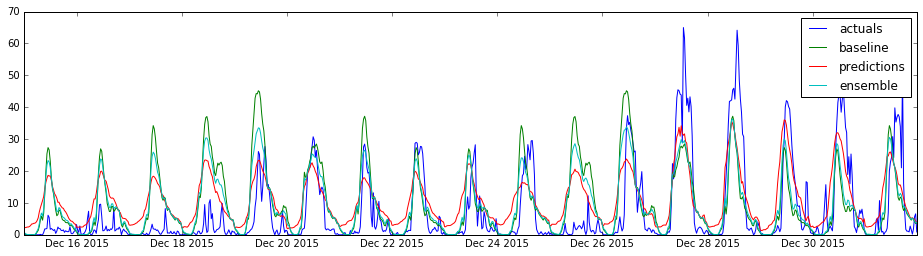

In [31]:
start = dt.date(2015, 12, 15)
end = dt.date(2016, 1, 1)

plt.figure(figsize=(16,4))
plt.plot(actuals[(actuals.index.date>=start) & (actuals.index.date<end)].waittime, label='actuals')
plt.plot(baseline[(baseline.index.date>=start) & (baseline.index.date<end)], label='baseline')
plt.plot(yhat[(yhat.index.date>=start) & (yhat.index.date<end)], label='predictions')
plt.plot(ensemble[(ensemble.index.date>=start) & (ensemble.index.date<end)], label='ensemble')
plt.legend();

In [26]:
pp = pprint.PrettyPrinter(indent=4)
pp.pprint(sorted(zip(im.X.columns, grid.best_estimator_.feature_importances_), key=lambda x: x[1])[::-1])

[   ('minofday', 0.78203345381483691),
    ('dayofweek', 0.020389372999875057),
    ('avg_delta_8', 0.0085152366537464465),
    ('avg_delta_7', 0.0062821770070823832),
    ('avg_delta_9', 0.006210049146906837),
    ('avg_delta_10', 0.0057263977931212642),
    ('avg_delta_6', 0.0053888101046932419),
    ('avg_delta_12', 0.0053225952206097183),
    ('avg_delta_11', 0.0050387526341625563),
    ('avg_delta_4', 0.0046254794978266896),
    ('avg_delta_3', 0.0046169267988518635),
    ('avg_delta_5', 0.0044848953495996357),
    ('avg_delta_2', 0.0042125536390353246),
    ('week', 0.0038872555939859338),
    ('month', 0.0037784352009926948),
    ('temp_mean_m2', 0.0037582249298157276),
    ('temp_mean_p3', 0.0037028843705584394),
    ('avg_delta_1', 0.0036321663500884695),
    ('temp_mean_p2', 0.0035827047626563716),
    ('temp_mean', 0.0035450107676312345),
    ('temp_mean_p1', 0.0035156550791425639),
    ('temp_min_p1', 0.0034883670074432591),
    ('temp_min_m1', 0.0034477418516687306),
    (

## Search for improvements

In [32]:
param_options = [{'max_depth': [20], 'max_features': ['sqrt'], 'min_samples_leaf': [4]},
                 {'max_depth': [20], 'max_features': ['sqrt'], 'min_samples_split': [100]}
                ]
[gridsearch(params, df_train) for params in param_options]

Weights:  1.0714043904 0.928729150824
Weights:  0.806814475146 1.16229672423


[{'baseline': 0.1059067680212642,
  'ensemble': 0.34955377693750123,
  'model': 0.190955917463558},
 {'baseline': 0.1059067680212642,
  'ensemble': 0.34344230305760226,
  'model': 0.047821241555075278}]

## Keep simple model - max_features='sqrt' & max_depth=20